#### **Principal Component Analysis (PCA)**


In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Let's take an Example
X = np.array([1,2,3,4,5])
Y = np.array([123,142,163,174,195])
Z = np.array([531,522,573,514,595])
data = pd.DataFrame({'X':X, 'Y':Y, 'Z':Z})
print("Shape of Data:", data.shape)
data.head()

Shape of Data: (5, 3)


,X,Y,Z
0,1,123,531
1,2,142,522
2,3,163,573
3,4,174,514
4,5,195,595


In [ ]:
# Manual Steps
print("\nStep 1. Calculate Mean of Each Column")
Mean_X = data["X"].mean()
print("Mean of X :",Mean_X)
Mean_Y = data["Y"].mean()
print("Mean of Y :",Mean_Y)
Mean_Z = data["Z"].mean()
print("Mean of Z :",Mean_Z)


Step 1. Calculate Mean of Each Column
Mean of X : 3.0
Mean of Y : 159.4
Mean of Z : 547.0


In [ ]:
print("\nStep 2. Calculate Variance")
# Variance = sum(((x(i) - mean(x))^2))/n-1
# Var(X) = [ (1–3.0)^2 + (2–3.0)^2 + (3-3.0)^2 + (4-3.0)^2 +(5-3.0)^2 ] / (5-1) = (4.0 + 1.0 + 0.0 + 1.0 + 4.0) / 4 = 10.0 / 4 = 2.5
print(data.var())


Step 2. Calculate Variance
X       2.5
Y     780.3
Z    1237.5
dtype: float64


In [ ]:
print("\nStep 3. Covariance Matrix :",data.cov().shape)
# Covariance (XY) = (sum|X(i)-mean(X) * Y(i)-mean(Y)|) / (n-1)
# Covar(XY) = [(1–3.0)*(123-159.4) + (2–3.0)*(142-159.4) + (3-3.0)*(163-159.4) + (4-3.0)*(174-159.4) + (5-3.0)*(195-159.4)] / (5-1)
# = [2.0*36.4 + 1.0*17.4 + 0.0 + 1.0*14.5 + 2.0*35.5] / 4
# = 175.7 / 4 = 43.92 ~ 44
# Covar(XY) = 44
# If you examine the calculations carefully, you’ll see the pattern to compute the covariance of the XZ and YZ columns.
# And you’ll see that Covar(XY) = Covar(YX).
print(data.cov())


Step 3. Covariance Matrix : (3, 3)
      X      Y       Z
X   2.5   44.0    30.0
Y  44.0  780.3   584.5
Z  30.0  584.5  1237.5


In [ ]:
print("\nStep 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.")
#Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(data.cov())
print("Eigen Values of Covariance Matrix :",eigen_values)
print("Eigen Vectors of Covariance Matrix :")
print(eigen_vectors)


Step 4. Eigenvalues and Eigenvectors for the calculated Covariance matrix.
Eigen Values of Covariance Matrix : [7.92511994e-03 3.82275407e+02 1.63801667e+03]
Eigen Vectors of Covariance Matrix :
[[ 0.99824773  0.05082148  0.03030913]
 [-0.05905775  0.82370297  0.56393759]
 [ 0.00369442 -0.56473941  0.82526102]]


In [ ]:
print("\nStep 5. Sort Eigenvalues in descending order")
# Sort the Eigenvalues in the descending order along with their corresponding Eigenvector.
# Remember each column in the Eigen vector-matrix corresponds to a principal component,
# So arranging them in descending order of their Eigenvalue
# will automatically arrange the principal component in descending order of their variability.
# Hence the first column in our rearranged Eigen vector-matrix will be a principal component that captures the highest variability.

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print("Sorting Index based on Eigen Value :",sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
print("Sorting Eigen Value :",sorted_eigenvalue)
#similarly sort the eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print("Sorted Eigen Vectors :")
print(sorted_eigenvectors)


Step 5. Sort Eigenvalues in descending order
Sorting Index based on Eigen Value : [2 1 0]
Sorting Eigen Value : [1.63801667e+03 3.82275407e+02 7.92511994e-03]
Sorted Eigen Vectors :
[[ 0.03030913  0.05082148  0.99824773]
 [ 0.56393759  0.82370297 -0.05905775]
 [ 0.82526102 -0.56473941  0.00369442]]


In [ ]:
print("\nStep 6. Select a subset from the rearranged Eigenvalue matrix")
# Select a subset from the rearranged Eigenvalue matrix as per our need i.e. number_comp = 2.
# This means we selected the first two principal components.
# select the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 2 #you can select any number of components.
print("Number of Principal Components :",n_components)
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print("Filter Eigen Vector Subset :")
print(eigenvector_subset)
# n_components = 2 means our final data should be reduced to just 2 variables.
# if we change it to 3 then we get our data reduced to 3 variables.


Step 6. Select a subset from the rearranged Eigenvalue matrix
Number of Principal Components : 2
Filter Eigen Vector Subset :
[[ 0.03030913  0.05082148]
 [ 0.56393759  0.82370297]
 [ 0.82526102 -0.56473941]]


In [ ]:
print("\nStep 7. Transform the data : Mean Centering the data  ")
# Finally, transform the data by having a dot product between the Transpose of the Eigenvector subset
# and the Transpose of the mean-centered data.
# By transposing the outcome of the dot product,
# the result we get is the data reduced to lower dimensions from higher dimensions.

X_mean = data - data.mean()
print("i. Input Data :")
print(data)
print("\nii. Mean of Each Column")
print(data.mean())
print("\niii. Mean(Data) = Mean(column) - Column_Value")
print(X_mean)
print("In above dataframe, I’ve subtracted the mean of each column from each cell of respective column itself.")
print("So the mean of each column now is zero.")

# Compute PC1 for row 1.
#Transform the data
X_reduced = np.dot(eigenvector_subset.transpose(),X_mean.transpose()).transpose()
print("\n")
print("PCA of Data = Dot Product of Mean(Data) and Eigen Vector Subset")
print(X_reduced)
print("\nThe final dimensions of Data reduced to (5,2) and originally the data was of higher dimensions (5,3)")

In [ ]:
# PCA in Python Code
# I initialize the PCA() class and call the fit_transform() on Data to simultaneously compute the weights of the Principal components
# then transform X to produce the new set of Principal components of Data.
# This I am storing in the df_pca object, which is converted to a pandas DataFrame.

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X=data)

# Store as dataframe and print
df_pca = pd.DataFrame(df_pca)
print("Original Data Shape :",data.shape)
print(data)
print("\n")
print("PCA Data Shape :",df_pca.shape)
print(df_pca.round(2))
# The first column is the first PC and so on. This dataframe (df_pca) has the same dimensions as the original data X.

# Principal Components Weights (Eigenvectors)
print("\n")
print("Eigen Vectors :")
print(pca.components_)

Original Data Shape : (5, 3)
   X    Y    Z
0  1  123  531
1  2  142  522
2  3  163  573
3  4  174  514
4  5  195  595


PCA Data Shape : (5, 2)
       0      1
0 -33.79 -21.05
1 -30.47  -0.26
2  23.49 -11.72
3 -18.97  30.71
4  59.75   2.32


Eigen Vectors :
[[ 0.03030913  0.56393759  0.82526102]
 [ 0.05082148  0.82370297 -0.56473941]]


In [ ]:
# How many components to take ?
pca = PCA()
df_pca = pca.fit_transform(X=data)
# Ratio of Variance explained by each component
# We can now look at the proportion of variance explained by each PC.
var = pca.explained_variance_ratio_
print(var)
print("So variance explained by each component are 0.81, 0.18, 0.000003")

# Inference :
# From the output we find that PC1 explains 81% of the variance,
# PC2 explains 18% and so on.
# We find that the first 2 components explain approximately 90% of the variance
# (0.81+0.18+0.000003)

[8.10778928e-01 1.89217150e-01 3.92274411e-06]
So variance explained by each component are 0.81, 0.18, 0.000003


Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

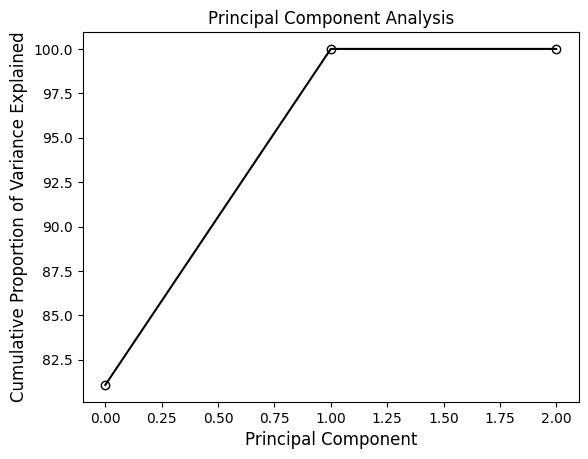

In [ ]:
# PCA CHART

# In the above step, we got the proportion of variance explained by each component
# which we need to decide the number of components.
# We calculated that the first seven components explain most of the variance,
# however, we plot the explained variance on a line graph.
# Here we plot the ratio of variance explained by each component using a line graph.
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [ ]:
# How to get the original features back
# The fitted pca object has the inverse_transform() method that gives back the original data when you input principal components features.
print("PCA Dataframe")
print(df_pca.round(2))
df_orig = pca.inverse_transform(df_pca)
print("\n")
print("Original Dataframe :")
print(pd.DataFrame(df_orig).round())

PCA Dataframe
[[-3.379e+01 -2.105e+01  9.000e-02]
 [-3.047e+01 -2.600e-01 -6.000e-02]
 [ 2.349e+01 -1.172e+01 -1.200e-01]
 [-1.897e+01  3.071e+01  1.000e-02]
 [ 5.975e+01  2.320e+00  7.000e-02]]


Original Dataframe :
     0      1      2
0  1.0  123.0  531.0
1  2.0  142.0  522.0
2  3.0  163.0  573.0
3  4.0  174.0  514.0
4  5.0  195.0  595.0


# Let's Take another example

**Boston Dataset**

In [ ]:
import requests
import pandas as pd
from io import StringIO

# Step 1: Download the data from the URL
url = "https://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text
data

" The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n prices and the demand for clean air', J. Environ. Economics & Management,\n vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n ...', Wiley, 1980.   N.B. Various transformations are used in the table on\n pages 244-261 of the latter.\n\n Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by 

In [ ]:
# Step 2: Parse the data
# The data contains text descriptions and the actual data starts after some lines
# We need to isolate the actual data part

# Splitting the data into lines
data_lines = data.split('\n')
data_lines

[" The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic",
 " prices and the demand for clean air', J. Environ. Economics & Management,",
 " vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics",
 " ...', Wiley, 1980.   N.B. Various transformations are used in the table on",
 ' pages 244-261 of the latter.',
 '',
 ' Variables in order:',
 ' CRIM     per capita crime rate by town',
 ' ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 ' INDUS    proportion of non-retail business acres per town',
 ' CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 ' NOX      nitric oxides concentration (parts per 10 million)',
 ' RM       average number of rooms per dwelling',
 ' AGE      proportion of owner-occupied units built prior to 1940',
 ' DIS      weighted distances to five Boston employment centres',
 ' RAD      index of accessibility to radial highways',
 ' TAX      full-value property-tax ra

In [ ]:
# Skipping the first 22 lines which are descriptions and extracting the data part
data_part = data_lines[22:]

In [ ]:
# Joining the data part back into a single string
data_part = '\n'.join(data_part)

In [ ]:
# Step 3: Process the data to split it correctly
# Each row of the dataset is spread over two lines, so we need to handle this
cleaned_data = []
for i in range(0, len(data_part.split('\n')), 2):
    line1 = data_part.split('\n')[i].strip()
    line2 = data_part.split('\n')[i+1].strip() if i+1 < len(data_part.split('\n')) else ''
    combined_line = ' '.join([line1, line2])
    cleaned_data.append(combined_line)

# Join the cleaned data lines into a single string for pandas to read
cleaned_data_str = '\n'.join(cleaned_data)

# Load the data into a pandas DataFrame
df = pd.read_csv(StringIO(cleaned_data_str), delim_whitespace=True, header=None)

# Naming the columns according to the Boston housing dataset description
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df.columns = column_names

# Displaying the DataFrame
df.head()



<ipython-input-20-b65f5620a30f>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(StringIO(cleaned_data_str), delim_whitespace=True, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Removing Response  variable

# As PCA works in an unsupervised learning setup,
# therefore we will remove the dependent i.e. response variable from our dataset.
# Note that PCA only works on numeric variables,
# and that is why we create dummy variables for categorical variables.
# As here we have only one categorical variable ‘Chas’ which is a binary categorical variable,
# we don’t require creating dummy variable and can use all the independent variables for performing PCA.

BosData2 = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                    'TAX','PTRATIO', 'B', 'LSTAT']]
BosData2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
import pandas as pd
df=pd.read_csv('')
df.head()

In [ ]:
import seaborn as sns
from seaborn import load_dataset

In [ ]:
df=sns.load_dataset('iris')
df.head()

In [ ]:
df2=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df2.head()

In [ ]:
!pip install bokeh.sampledata
import bokeh.sampledata



In [ ]:
from bokeh.sampledata.stocks import MSFT
df=pd.DataFrame(MSFT)
df.head()

,date,open,high,low,close,volume,adj_close
0,2000-03-01,89.62,94.09,88.94,90.81,106889800,33.68
1,2000-03-02,91.81,95.37,91.12,93.37,106932600,34.63
2,2000-03-03,94.75,98.87,93.87,96.12,101435200,35.65
3,2000-03-06,96.00,97.37,90.12,90.62,93609400,33.61
4,2000-03-07,96.12,97.50,91.94,92.87,135061000,34.45


In [ ]:
df2=df[['open', 'high', 'low', 'close', 'adj_close', 'volume']]

In [ ]:
# Scaling Features

# We will have to first scale the dataset to perform PCA in Python.
scale = StandardScaler()
scaled_data = scale.fit_transform(BosData2)


In [ ]:
# We can change the above output into a dataset.

scaled_data = pd.DataFrame(scaled_data,columns=BosData2.columns)
scaled_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
scaled_data.describe()

In [ ]:
# Splitting the dataset into train and test

# PCA should not be made to run on the entire dataset
# As this would cause the dataset to leak thus causing overfitting
# Also, we should not perform PCA on train and test separately
# as the level of variance will be different in both these datasets
# which will the cause the final vectors of these two datasets to have different directions
# We first divide the dataset into train and test and perform PCA on train dataset
# and transform the test dataset using that PCA model (which was fitted on the train dataset).

# Target Variable
Y = df['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)

# Initialize and Fit PCA
# We first initialize PCA for having 13 components (for 13 continuous variables in the dataset)
# and then we fit this model on the scaled features.

pca = PCA(n_components=13)
pca_model = pca.fit(X_train)

In [ ]:
# Generate PCA Loadings

# We use transform command which transforms the scaled data to PCA loadings for each observation.
pca_train = pca_model.transform(X_train)


In [ ]:
# Generate Loading Matrix

# We now generate the principal components loading matrix
# by using the attribute components_ of the pca command for each variable.

Variable_Names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                    'TAX','PTRATIO', 'B', 'LSTAT']
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

# Inference :
# This Loading Matrix is like a correlation matrix.
# The variable having the highest correlation with the columns will be the first principal component
#  For eg, the variable indus has the highest correlation with PC1, therefore, indus will be PC 1
#  Heading in the output should be PC1, PC2 and so on. Will be renaming them in the upcoming steps

,0,1,2,3,4,5,6,7,8,9,10,11,12
CRIM,0.261028,0.402021,0.272849,0.083141,0.056245,0.649569,-0.433235,-0.057887,0.215429,-0.063131,0.128398,0.064637,0.040974
ZN,-0.248594,0.378921,0.236975,0.288462,-0.135785,0.023437,0.443978,0.463129,0.217877,-0.354617,-0.201162,-0.086564,-0.058977
INDUS,0.344874,-0.105353,-0.039082,0.016200,-0.008651,-0.099526,0.308914,-0.097501,0.734052,0.271809,0.226253,-0.045638,-0.295420
CHAS,-0.004040,-0.306065,0.234459,0.740967,0.490540,-0.166000,-0.174522,-0.017959,0.020874,0.013390,-0.009374,-0.031098,0.040853
NOX,0.340383,-0.191293,0.153285,0.059000,-0.137624,0.007177,0.244216,-0.085684,-0.095101,-0.281641,-0.052457,0.798674,0.074809
RM,-0.199428,-0.158725,0.640229,-0.421555,0.181577,-0.063845,-0.073905,0.289464,0.115754,0.383456,-0.168155,0.174593,0.044029
AGE,0.317344,-0.336219,0.057659,-0.063865,-0.072904,0.098528,-0.008672,0.608906,-0.224804,-0.154259,0.522464,-0.211679,-0.029531
DIS,-0.320117,0.385590,-0.109335,0.173370,0.051794,-0.110102,0.067926,0.104640,-0.137332,0.381458,0.596248,0.395582,-0.009908
RAD,0.306986,0.286627,0.257125,-0.048092,0.234509,-0.073091,0.206277,-0.156843,-0.465397,0.069271,-0.068748,-0.124110,-0.621425
TAX,0.337749,0.234736,0.160595,-0.037207,0.150966,-0.101342,0.378124,-0.140673,-0.110272,0.148007,0.072336,-0.242639,0.713897


In [ ]:
# Variance explained by each Principal Component

# We took the number of components for PCA equal to the number of variables in our dataset
# which is 13 in our case
# we will figure out the optimum value of the number of components to run PCA
# i.e. reduce the number of components to be considered for the modeling algorithms
# thus in a way reducing the number of features
# In order to decide the number of Principal Components,
# we analyze the proportion of variance explained by each component
# We use the explained_variance function for computing variance explained by each Principal Component.

pca_model.explained_variance_

array([6.15535877, 1.3837924 , 1.17884792, 0.82071583, 0.7800156 ,
       0.66886856, 0.56912498, 0.38614551, 0.27744284, 0.22153714,
       0.19341501, 0.15764127, 0.0663099 ])

In [ ]:
# Ratio of Variance explained by each component

# We can now look at the proportion of variance explained by each PC.
var = pca_model.explained_variance_ratio_
var

# Inference :
# From the output we find that PC1 explains 47% of the variance,
# PC2 explains 11% and so on.
# We find that the first seven components explain approximately 90% of the variance
# (0.478 + 0.107 + 0.091 + 0.063 + 0.060 + 0.052 + 0.044 = 0.898)

array([0.47867295, 0.10761095, 0.09167339, 0.06382316, 0.0606581 ,
       0.05201472, 0.04425814, 0.0300287 , 0.02157541, 0.01722789,
       0.01504097, 0.01225901, 0.00515661])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

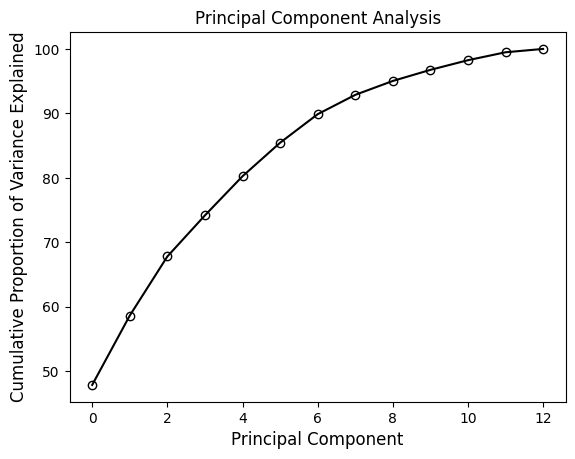

In [ ]:
# PCA CHART

# In the above step, we got the proportion of variance explained by each component
# which we need to decide the number of components.
# We calculated that the first seven components explain most of the variance,
# however, we plot the explained variance on a line graph.
# Here we plot the ratio of variance explained by each component using a line graph.
# This PCA chart helps us to decide the number of principal components to be taken for the modeling algorithm.

cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)


In [ ]:
# Renaming Columns

# We will rename the columns of the loading matrix that was generated for each observation using PCA.
# After renaming, we will select 7 principal components
# and make a data frame with the dependent variable and the 7 PCs.

pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 14)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-2.206607,-1.550518,1.694059,1.829224,2.345380,-0.699030,-1.130661,0.469812,0.581400,0.291183,-0.419261,0.129598,-0.005218
1,-2.895220,0.632332,-0.117836,0.029440,-0.111146,0.039596,-0.070625,-0.811305,0.094068,0.318388,0.168244,0.272926,-0.198293
2,-1.328565,-0.869346,-0.677164,-0.369238,-0.301381,0.432975,-0.884145,-0.255710,-0.509150,-0.629288,-0.456284,-0.268324,-0.137592
3,2.894334,0.058086,0.311875,-0.535148,0.709886,-0.038247,1.237339,0.022792,-0.471815,0.210664,-0.106260,0.289861,-0.100084
4,3.388655,0.337146,0.722763,-0.542509,0.758414,0.939876,0.556901,0.403837,-0.204815,0.488596,-0.338563,-0.027698,-0.055221


Text(0, 0.5, 'Cumulative Proportion')

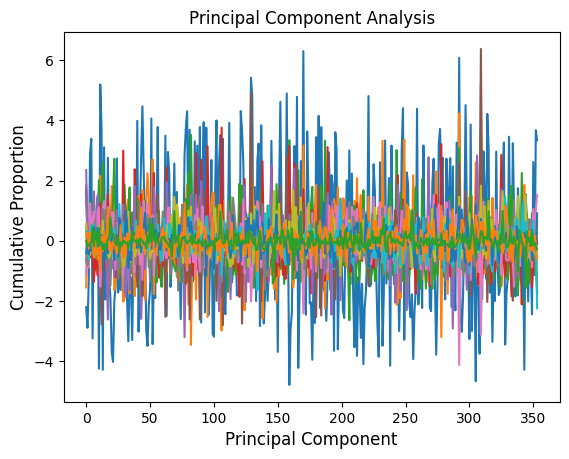

In [ ]:
plt.plot(pca_train)
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion",fontsize=12)

In [ ]:
# Concatenate Dependent variable and Principal Components

# We now concatenate the dependent variable i.e. "MEDV" with principal components and
# Suppose take the first seven components for our analysis.
# First, we will reset the index for Y_train as we need to concatenate datasets to make one whole train dataset.
# Then we will remove the index variable from the dataset
# and make a subset of the dataset having 7 PCs and the dependent variable.

Y_train1 = Y_train.reset_index()

pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7']]
pca_train3.head()
pca_train3
# After this step, run any alogirthim as per your choice !!

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-2.206607,-1.550518,1.694059,1.829224,2.345380,-0.699030,-1.130661
1,-2.895220,0.632332,-0.117836,0.029440,-0.111146,0.039596,-0.070625
2,-1.328565,-0.869346,-0.677164,-0.369238,-0.301381,0.432975,-0.884145
3,2.894334,0.058086,0.311875,-0.535148,0.709886,-0.038247,1.237339
4,3.388655,0.337146,0.722763,-0.542509,0.758414,0.939876,0.556901
...,...,...,...,...,...,...,...
349,-2.442755,-0.657508,0.915610,-1.530197,0.587114,-0.000155,-0.886095
350,2.614303,0.119141,0.273125,-0.657842,0.861949,0.024489,1.053278
351,-1.142936,0.007299,-1.034909,-0.396122,0.456034,-0.043470,-0.429346
352,3.673395,0.229086,-0.457964,0.115213,0.320728,0.549120,1.029804


Text(0, 0.5, 'Cumulative Proportion of Feature Extraction')

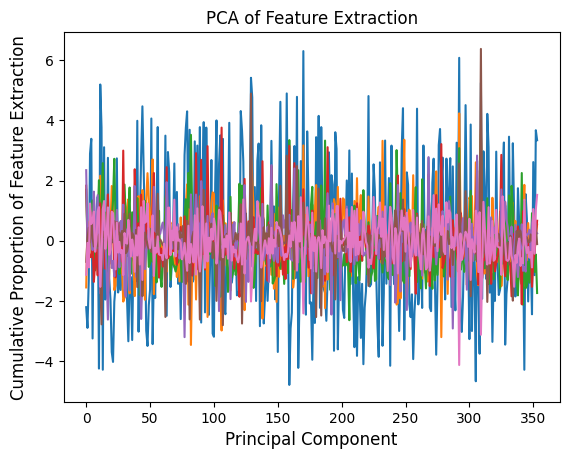

In [ ]:
plt.plot(pca_train3)
plt.title('PCA of Feature Extraction',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Feature Extraction",fontsize=12)